In [98]:
import sys
sys.path.append('..')
from pyzx.graph import Graph
from pyzx.examples import *
from pyzx.simplify import *
from pyzx.drawing import *
from fractions import Fraction
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
sz = 2
g = Graph(backend='igraph')
g.add_vertices(sz+2)
g.add_edges([(i,i+1) for i in range(sz+1)])
g.set_type(0,0)
g.set_type(sz+1,0)
for i in range(1,sz+1):
    g.set_type(i, 1)
g.set_angle(1,Fraction(1,4))
g.set_angle(2,Fraction(1,4))

In [21]:
g.get_angles()

[0, Fraction(1, 2), 0]

In [59]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

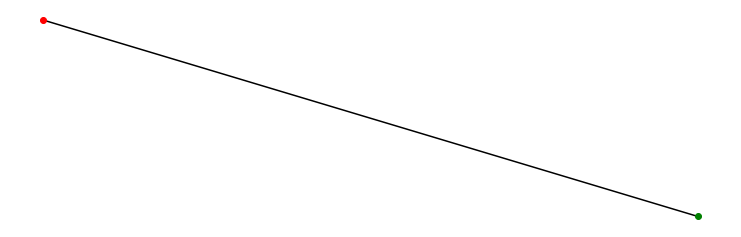

In [120]:
fig1 = plt.figure(1, (10, 3))
ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=0.3)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.plot([0,1],[1,0], 'k')
plt.plot(0, 1, 'o', color='red')
plt.plot(1, 0, 'o', color='green')
#plt.scatter([1,2,3],[4,5,6])